# Case Mercado de Games

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [41]:
base_dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [42]:
# Dimensão
base_dados.shape

(1034, 9)

In [43]:
# Verifica se há campos nulos
base_dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

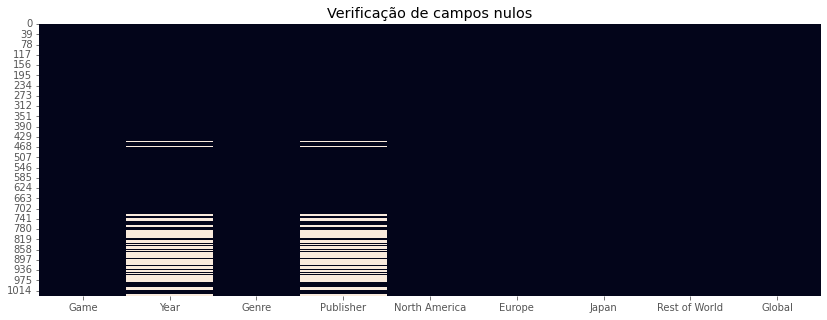

In [44]:
# Nulos gráficos
plt.figure(figsize=(14, 5))
plt.title('Verificação de campos nulos')
sns.heatmap(base_dados.isnull(), cbar=False);

In [45]:
# Retirando os valores nulos
base_dados.dropna(inplace=True)

In [46]:
# Estatisticas
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


Text(0, 0.5, 'Quantidade de vendas (mi)')

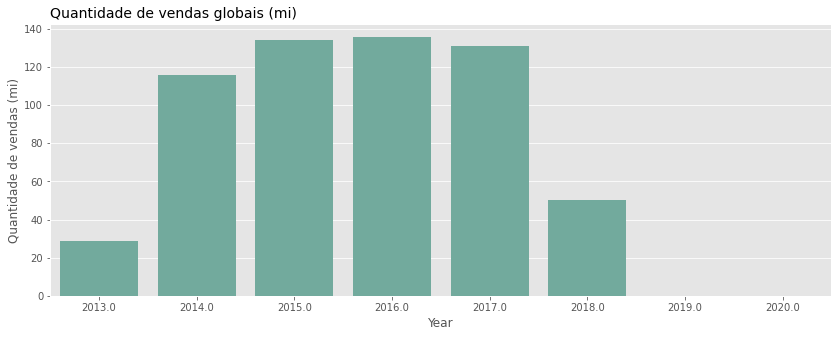

In [47]:
plt.figure(figsize=(14, 5))
plt.title('Quantidade de vendas globais (mi)', loc='left', fontsize=14)
sns.barplot(data=base_dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)
plt.ylabel('Quantidade de vendas (mi)')

In [48]:
# Retirar os anos 
base_dados = base_dados.loc[ (base_dados['Year'] != 2019) & (base_dados['Year'] != 2020) ]
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


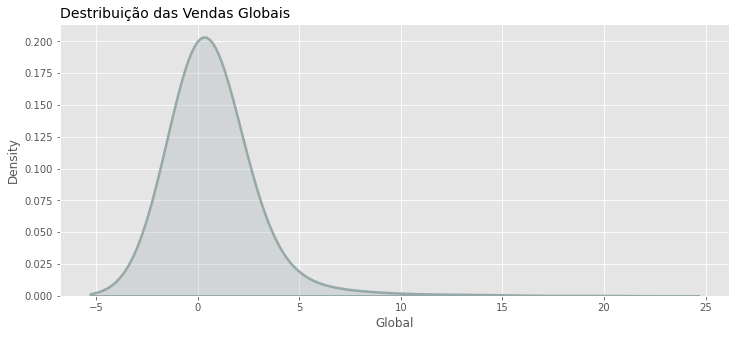

In [49]:
plt.figure(figsize=(12, 5)) # Tamanho
plt.style.use('ggplot') # Estilo
plt.title('Destribuição das Vendas Globais', loc='left', fontsize=14) # Titulo
sns.kdeplot(base_dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);

In [50]:
base_dados.groupby(by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


<AxesSubplot:xlabel='Year', ylabel='Global'>

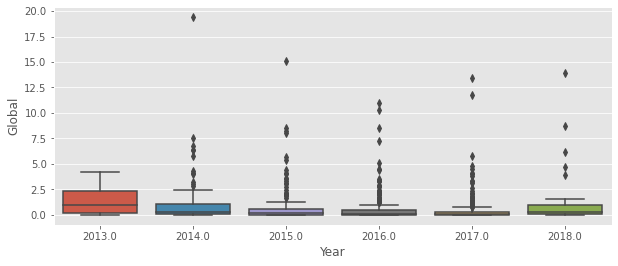

In [52]:
plt.figure(figsize=(10, 4)) # Tamanho
sns.boxplot(data=base_dados, x='Year', y='Global')